# **<center>Fundamentos de Ciência de Dados e Inteligência de Negócios</center>**

Unimar, Marilia-SP

**Larissa e Luiz Fernando**


Fazer:
problema: Consultoria para compradores de aviões

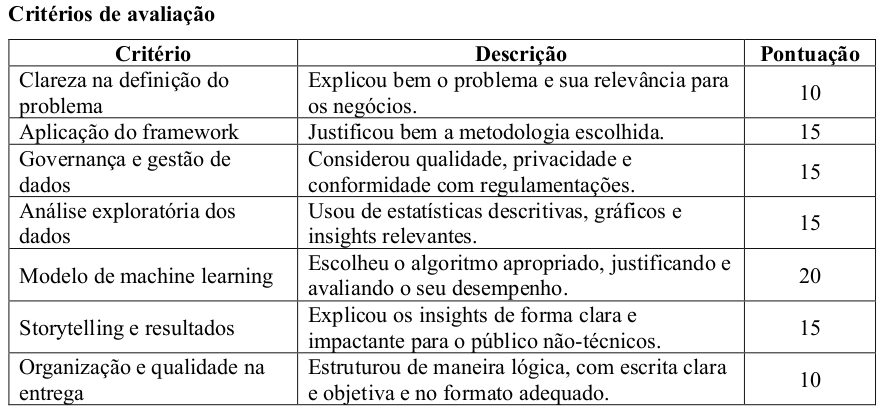

fontes para storytelling:

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

https://medium.com/data-hackers/matplotlib-e-storytelling-com-dados-pt-ii-35e0da269a1e


🎲 **COLETA DE DADOS**



In [ ]:
import kagglehub

path = kagglehub.dataset_download("asinow/airplane-price-dataset")

print("Path to dataset files:", path)

100%|██████████| 238k/238k [00:00<00:00, 786kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/asinow/airplane-price-dataset/versions/1


In [ ]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


📜 **LER DADOS**

In [ ]:
file = os.listdir(path)

csv = [f for f in file if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv))
df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


**PROCESSAMENTO DE DADOS**

O processamento de dados é importante para que análise dos dados tenha mais fluidez e acertividade no momento da empresa analisar os dados. Logo, limpar, transformar e preparar os dados para análise é totalmente bem vindo, se necessário, assim muitasvezes tornamosdados confusos em dados que nos permitem utiliza-los e criar insights significativos.

👁️‍🗨️ **ANALISE**

In [ ]:
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


In [ ]:
df.isna().sum()

,0
Model,0
Üretim Yılı,0
Motor Sayısı,0
Motor Türü,0
Kapasite,0
Menzil (km),0
Yakıt Tüketimi (L/saat),0
Saatlik Bakım Maliyeti ($),0
Yaş,0
Satış Bölgesi,0


💊 **TRATAMENTO DE DADOS**

In [ ]:
df.rename(columns={'Model':'modelo',
                   'Üretim Yılı':'ano_producao',
                   'Motor Sayısı':'qtde_motores',
                   'Motor Türü':'tipo_motor',
                   'Kapasite':'capacidade',
                   'Menzil (km)':'faixa_km',
                   'Yakıt Tüketimi (L/saat)':'consumo_combutivel_por_hora',
                   'Saatlik Bakım Maliyeti ($)': 'custo_manutencao_por_horar',
                   'Yaş':'idade',
                   'Satış Bölgesi':'regiao_venda',
                   'Fiyat ($)':'preco'},inplace=True)

In [ ]:
df.columns

Index(['modelo', 'ano_producao', 'qtde_motores', 'tipo_motor', 'capacidade',
       'faixa_km', 'consumo_combutivel_por_hora', 'custo_manutencao_por_horar',
       'idade', 'regiao_venda', 'preco'],
      dtype='object')

In [ ]:
df["ano_producao"].value_counts(normalize=True)
df["modelo"].value_counts().sort_index().head()

,count
modelo,
Airbus A320,2048
Airbus A350,2107
Boeing 737,2121
Boeing 777,2011
Bombardier CRJ200,2051



🔹<font color="#4682B4" size="3">**UNIVARIADA**</font>

Na análise univariada, a empresa decidiu analisar quantas vezes cada **modelo** de avião apareceu no dataset. Sendo coletados os numeros absolutos com `value_counts()`

In [ ]:
df["modelo"].value_counts()

,count
modelo,
Boeing 737,2121
Airbus A350,2107
Bombardier CRJ200,2051
Airbus A320,2048
Cessna 172,2039
Boeing 777,2011


Em seguida também é possível analisar a proporção chamando o argumento que faz normalização, dividindo cada contagem pelo número de registros, contando quantas vezes cada modelo aparece no dataset, mas de forma mais intuitiva e facilitando a visão de stakeholders, para que entendam melhor no momento em que há a representação de um Storytelling.

In [ ]:
df["modelo"].value_counts(normalize=True)

,proportion
modelo,
Boeing 737,0.171366
Airbus A350,0.170235
Bombardier CRJ200,0.165711
Airbus A320,0.165468
Cessna 172,0.164741
Boeing 777,0.162479


In [ ]:
df["ano_producao"].value_counts().sort_index().head()

,count
ano_producao,
1980,271
1981,288
1982,264
1983,265
1984,281


>   <font color="#8B008B" size="5">
Storytelling: Com a representação a seguir é possível notar a quantidade de aviões por modelo, mostrando que temos mais de 2 mil aviões de cada modelo 🛩
</font>


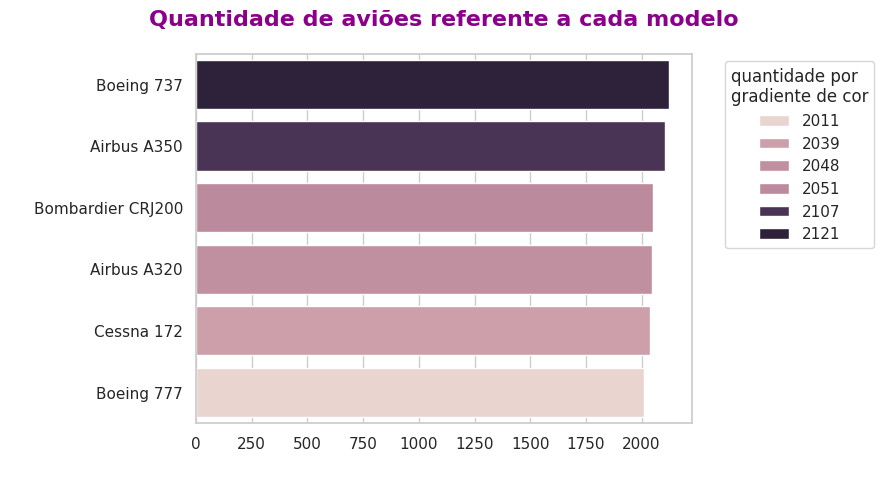

In [ ]:
gp=df["modelo"].value_counts()
gp=gp.reset_index()
gp.columns = ["modelo", "quantidade"]
sns.set_theme(style="whitegrid")
plt.title("Quantidade de aviões referente a cada modelo", fontsize=16, fontweight="bold", color='#8B008B', pad=20)
sns.barplot(data=gp,x="quantidade",y="modelo", hue="quantidade", orient="y")
plt.legend(title="quantidade por \ngradiente de cor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks()
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

>   <font color="#4682B4" size="5">
Storytelling: A representação a seguir é possível notar a quantidade de cada tipo de motor, mostrando que temos mais de 10 mil tipos de motores Turbofan 🧑🏼‍🔧
</font>

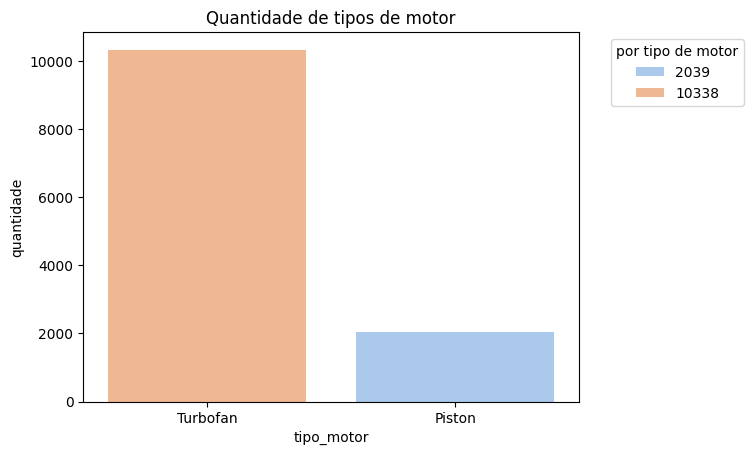

In [ ]:
gp = df["tipo_motor"].value_counts()
gp = gp.reset_index()
gp.columns = ["tipo_motor", "quantidade"]

plt.title("Quantidade de tipos de motor")
sns.barplot(data=gp, x="tipo_motor", y="quantidade")
sns.barplot(data=gp,x="tipo_motor",y="quantidade", hue="quantidade", orient="x", palette="pastel")
plt.legend(title="por tipo de motor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


🔹🔹<font color="#4682B4" size="3">**BIVARIADA**</font>

In [ ]:
# ver plotly para storytelling